### K-means
1. Choose 3 to 6 features. Explain the choice.
2. Apply K-means:
• At K=5
• At K=9
• In both cases: 10 or more random initializations, choose the best solution over the K-means criterion; present it in a table
3. Interpret each found partition by using features from the data table – as instructed in the lecture slides. Explain why you consider one of them better than the other in this perspective

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
import matplotlib.pyplot as plt
from math import inf
import random as rdm
import os
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from IPython.display import display, Markdown
import warnings
import sys
warnings.filterwarnings('ignore')


In [3]:
spotify_data = pd.read_csv('desktop/MS_DS/MMDA/Data/dataset-of-90s.csv')# load data
print("*****In the train set*****")
print(spotify_data.isna().sum())
print("\n")
print("*****In the test set*****")
print(spotify_data.isna().sum()) #cheking for missing values, so no missing values

*****In the train set*****
track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


*****In the test set*****
track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.006990,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.000000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.495000,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.926000,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.003390,0.1530,0.961,153.166,430653,4,25.57331,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,(You're A) Go Nowhere,Reagan Youth,spotify:track:4e86fqSFhqRQk3Z9hm7XHt,0.396,0.795,9,-6.070,0,0.2340,0.000928,0.000209,0.1820,0.762,152.943,82107,4,30.34109,6,0
5516,La Fiebre de Norma,La Castañeda,spotify:track:43DFcnOZprnVlAFKwgBJ3e,0.621,0.655,9,-6.281,0,0.0309,0.050600,0.006260,0.0937,0.690,134.167,211653,4,34.89506,10,0
5517,Good Times,Edie Brickell,spotify:track:6UPfnVoOq3y3BvapBIKs8J,0.562,0.314,10,-15.213,0,0.0298,0.440000,0.000011,0.1060,0.571,166.847,189827,4,21.11763,10,1
5518,Inane,KMFDM,spotify:track:2Ao3Wi4raEOQfKQiU9EU8y,0.622,0.781,7,-6.080,1,0.0368,0.000101,0.755000,0.3830,0.214,120.051,330053,4,47.13558,11,0


In [45]:
music_90s = pd.read_csv('desktop/MS_DS/MMDA/genre_music.csv')
music_90s = music_90s[music_90s['decade']=='90s']
music_90s

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
23313,Misty Roses,Astrud Gilberto,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.006990,0.1680,0.543,116.211,158.840,4,53.89523,6,0,90s,pop
23314,Never Ever,All Saints,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.000000,0.0492,0.309,134.187,387.573,4,32.16853,16,1,90s,r&b
23315,Soul Sermon,Gregg Karukas,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.495000,0.0809,0.265,93.982,237.267,4,42.05369,9,0,90s,pop
23316,Clarinet Marmalade - Live,Alton Purnell,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.926000,0.6750,0.763,114.219,375.933,4,80.99693,10,0,90s,r&b
23317,До смерті і довше - Drum & Base and Rock Remix,Skryabin,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.003390,0.1530,0.961,153.166,430.653,4,25.57331,20,0,90s,r&b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28827,(You're A) Go Nowhere,Reagan Youth,0.396,0.795,9,-6.070,0,0.2340,0.000928,0.000209,0.1820,0.762,152.943,82.107,4,30.34109,6,0,90s,rap
28828,La Fiebre de Norma,La Castañeda,0.621,0.655,9,-6.281,0,0.0309,0.050600,0.006260,0.0937,0.690,134.167,211.653,4,34.89506,10,0,90s,pop
28829,Good Times,Edie Brickell,0.562,0.314,10,-15.213,0,0.0298,0.440000,0.000011,0.1060,0.571,166.847,189.827,4,21.11763,10,1,90s,pop
28830,Inane,KMFDM,0.622,0.781,7,-6.080,1,0.0368,0.000101,0.755000,0.3830,0.214,120.051,330.053,4,47.13558,11,0,90s,r&b


In [53]:
joint = pd.merge(check, music_90s[['genre','track','artist']], how='inner', on=['track', 'artist'])
joint

,instrumentalness,energy,loudness,danceability,K4,K9,track,artist,genre
0,0.006990,0.316,-15.769,0.527,2,1,Misty Roses,Astrud Gilberto,pop
1,0.000000,0.541,-5.485,0.738,1,4,Never Ever,All Saints,r&b
2,0.495000,0.419,-10.662,0.736,2,8,Soul Sermon,Gregg Karukas,pop
3,0.926000,0.594,-13.086,0.565,0,8,Clarinet Marmalade - Live,Alton Purnell,r&b
4,0.003390,0.760,-10.077,0.513,1,7,До смерті і довше - Drum & Base and Rock Remix,Skryabin,r&b
...,...,...,...,...,...,...,...,...,...
5529,0.000209,0.795,-6.070,0.396,1,2,(You're A) Go Nowhere,Reagan Youth,rap
5530,0.006260,0.655,-6.281,0.621,1,3,La Fiebre de Norma,La Castañeda,pop
5531,0.000011,0.314,-15.213,0.562,2,1,Good Times,Edie Brickell,pop
5532,0.755000,0.781,-6.080,0.622,0,8,Inane,KMFDM,r&b


As features we have chosen the most appropriate ones in order to group them by types. Features used for K-means clustering:  ['instrumentalness','energy','loudness','danceability']

In [4]:
spotify_4_feat = spotify_data[['instrumentalness','energy','loudness','danceability']]


In [5]:
scaler_data =pd.DataFrame(StandardScaler().fit_transform(spotify_4_feat[:]),
                          columns=spotify_4_feat.columns) 
# the dataset has been additionally standardised for clustering

In order to  to determine the optimal number of clusters into which the data may be clustered we use the Elbow Method

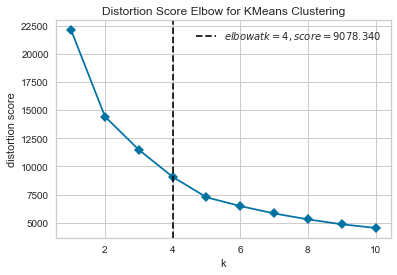

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11),timings=False)
visualizer.fit(scaler_data)        
visualizer.show() 
# by distortion score Elbow for KMeans clustering we see that 
# the optimal number of clusters is 4.
# Also we see a significant difference in distortion score(the sum 
# of squared distances from each point to its assigned center)between 4 and 9 number 
# of clusters, so for our example we will consider as an optimal number of clusters
# 4 and 9.

In [9]:
Ks = [4,9] 

inertias = np.zeros((2,10))

trial_count = 10
best_inertias=[]

j=0 #number of row in inertias

for k in Ks:
    best_inertia = float(inf)
    optimal_centers = [] 
    
    for i in range(trial_count):
        kmeans = KMeans(n_clusters=k, n_init = 1, max_iter = 500, init='random', 
                           tol=1e-4, algorithm='full', random_state = i).fit(scaler_data)
        inertias[j,i] = kmeans.inertia_
        obj_labels = kmeans.labels_
        
        if inertias[j,i] < best_inertia:
            best_inertia = inertias[j,i]
            optimal_centers = kmeans.cluster_centers_
            best_labels = obj_labels #save labels for best inertia
            best_random = i
            
    spotify_4_feat['K' + str(k)] = best_labels
    best_inertias = np.append(inertias, best_inertia)
    print("Best inertia for "+str(k)+"-cluster clustering:", best_inertia)
    print("Random state for this clustering: ", best_random)
    j+=1
    print("Optimal centers:", optimal_centers)

Best inertia for 4-cluster clustering: 9078.353140213714
Random state for this clustering:  0
Optimal centers: [[ 2.00556071  0.32645691  0.02426037 -0.47843606]
 [-0.44757452  0.7207432   0.59426869  0.20502076]
 [-0.44721828 -0.71747963 -0.29491887  0.15689585]
 [ 1.64820138 -1.82803202 -2.3442862  -1.16593732]]
Best inertia for 9-cluster clustering: 4869.062831953098
Random state for this clustering:  2
Optimal centers: [[ 1.96118498  0.95841177  0.41848124 -1.42413596]
 [-0.38343019 -1.40945395 -1.05644424 -0.38721519]
 [-0.41714851  1.05972466  0.72973489 -0.90588898]
 [-0.45435903  0.7727219   0.64540029  0.70067948]
 [-0.48117722 -0.31056322 -0.05586543  1.01101383]
 [ 1.62439289 -2.14803353 -3.44658943 -1.64843239]
 [ 2.16801527 -1.41909289 -1.40370209 -0.85523734]
 [-0.47749616 -0.2921862   0.14589714 -0.3803029 ]
 [ 1.94187631  0.09230154 -0.12161296  0.38158381]]


In [12]:
spotify_4_feat[1:101]

,instrumentalness,energy,loudness,danceability,K4,K9
1,0.000000,0.541,-5.485,0.738,1,4
2,0.495000,0.419,-10.662,0.736,2,8
3,0.926000,0.594,-13.086,0.565,0,8
4,0.003390,0.760,-10.077,0.513,1,7
5,0.179000,0.985,-4.529,0.166,1,2
6,0.000673,0.597,-8.601,0.679,1,4
7,0.009430,0.634,-10.408,0.811,1,4
8,0.000000,0.234,-15.784,0.528,2,1
9,0.134000,0.989,-5.564,0.207,1,2
10,0.001110,0.913,-7.253,0.705,1,3


In [9]:
inertias_ = pd.DataFrame(inertias, index = ['K4','K9'],
                        columns = ['run #' + str(x) for x in range (0,10)])
inertias_

,run #0,run #1,run #2,run #3,run #4,run #5,run #6,run #7,run #8,run #9
K4,9078.353140,9213.236432,9079.864817,9212.995426,9211.870937,9211.724287,9212.995426,9211.724287,9213.236432,9211.728137
K9,4988.198833,5354.939784,4869.062832,5033.459418,5354.395990,5358.308445,5354.703667,4981.218132,4987.925230,5356.863716


In [10]:
# we see that the best random for K4 is run#0 (9078.353140)
#                             for K9 is run#2 (4869.062832)

In [13]:
spotify_4_feat.to_csv("data_with_clusters.csv")

## Checking Kmeans 

In [29]:
check=pd.merge(spotify_4_feat,spotify_data[['track','artist']], left_index=True, right_index=True)
check

,instrumentalness,energy,loudness,danceability,K4,K9,track,artist
0,0.006990,0.316,-15.769,0.527,2,1,Misty Roses,Astrud Gilberto
1,0.000000,0.541,-5.485,0.738,1,4,Never Ever,All Saints
2,0.495000,0.419,-10.662,0.736,2,8,Soul Sermon,Gregg Karukas
3,0.926000,0.594,-13.086,0.565,0,8,Clarinet Marmalade - Live,Alton Purnell
4,0.003390,0.760,-10.077,0.513,1,7,До смерті і довше - Drum & Base and Rock Remix,Skryabin
...,...,...,...,...,...,...,...,...
5515,0.000209,0.795,-6.070,0.396,1,2,(You're A) Go Nowhere,Reagan Youth
5516,0.006260,0.655,-6.281,0.621,1,3,La Fiebre de Norma,La Castañeda
5517,0.000011,0.314,-15.213,0.562,2,1,Good Times,Edie Brickell
5518,0.755000,0.781,-6.080,0.622,0,8,Inane,KMFDM


In [66]:
joint[(joint['K4']==1)&(joint['genre']=='edm')].head(5)

,instrumentalness,energy,loudness,danceability,K4,K9,track,artist,genre
6,0.000673,0.597,-8.601,0.679,1,4,Baby-Baby-Baby,TLC,edm
101,0.000454,0.777,-10.903,0.612,1,3,Waiting For That Day,George Michael,edm
156,0.000316,0.915,-6.737,0.549,1,2,Revolution Rock,Los Fabulosos Cadillacs,edm
253,0.000000,0.811,-6.148,0.525,1,2,She's Playing Hard To Get,Hi-Five,edm
272,0.000000,0.818,-7.666,0.483,1,2,Inside Out,Eve 6,edm


In [80]:
joint[joint['K9']==8].head(10)

,instrumentalness,energy,loudness,danceability,K4,K9,track,artist,genre
2,0.495,0.419,-10.662,0.736,2,8,Soul Sermon,Gregg Karukas,pop
3,0.926,0.594,-13.086,0.565,0,8,Clarinet Marmalade - Live,Alton Purnell,r&b
24,0.511,0.837,-7.273,0.709,1,8,A Life of Possibilities,Dismemberment Plan,r&b
51,0.928,0.729,-13.383,0.595,0,8,Going Great,Keith Mansfield,pop
52,0.915,0.575,-7.341,0.735,0,8,Teenage Chase,Keith Mansfield,pop
64,0.870,0.437,-12.955,0.802,0,8,Stock Yards Strut,Small Jazz Band,r&b
72,0.951,0.470,-11.804,0.826,0,8,Oirectine,Boards of Canada,r&b
110,0.580,0.470,-10.193,0.496,0,8,Trouble Man,Reuben Wilson,r&b
132,0.798,0.594,-8.882,0.559,0,8,Influência Do Jazz,Tamba Trio,pop
155,0.787,0.976,-7.649,0.599,0,8,James Brown Is Dead,L.A. Style,r&b


## Relative difference

#### Relative difference for 4th partition 

In [14]:
directory = '/Users/saktanov.abdul/opt/anaconda3/lib/python3.7/site-packages'

In [18]:
df = spotify_4_feat

In [20]:
# Grand means for each feature can be calculated immediately
grand_means = df.mean().tolist()[0:-len(Ks)]
# Cluster means will be stored in a dictionary with K as keys
cluster_means = {}
                    
# A simple lambda-function to calculate cluster means
get_cluster_means = lambda K : [df[df['K' + str(K)] == cluster_i].mean().to_list()[0:-len(Ks)] for cluster_i in range(K)]
 
for K in Ks:
    cluster_means[K] = get_cluster_means(K)

def compare_means(K):
    """
    Compare feature means with grand means
    This function compares feature means of a known K-partition with the threshold of 30% and prints
    the results.
    """
    verbose_means = pd.DataFrame([grand_means] + [cluster_means[K][cluster_i] for cluster_i in range(K)],
    columns=df.columns.to_list()[0:-len(Ks)])
    verbose_means.index = pd.Index(['Grand mean'] + [f'Cluster {cluster_i} mean' for cluster_i in range(K)])
    grand_means_array = np.array(grand_means)
    display(Markdown(r'$$\underline{K = ' + str(K) + '}$$'))
    display(Markdown('Overall results:'))
    display(verbose_means)
    for cluster_i in range(K):
        cluster_i_means_array = np.array(cluster_means[K][cluster_i])
        absolute_diff = cluster_i_means_array - grand_means
        relative_diff = absolute_diff / grand_means * 100
        significant_features = [df.columns.to_list()[feature_i] for feature_i in range(len(grand_means)) if
        abs(relative_diff[feature_i]) > 30.0]
        print()
        display(Markdown('Comparison of means for cluster $' + str(cluster_i) + '$:'))
        verbose_means = pd.DataFrame([grand_means, cluster_i_means_array, absolute_diff, relative_diff], columns=df.columns.to_list()[0:-len(Ks)])
        verbose_means.index = pd.Index(['Grand mean', f'Cluster {cluster_i} mean', 'Absolute difference', 'Relativedifference, %'])
        display(verbose_means)
        verbose_means.to_excel(os.path.join(directory, r'cluster'+str(K)+'-'+str(cluster_i)+'.xlsx'))
        display(Markdown('Significant features*: ' + ', '.join([f'`{name}`' + (r' $\uparrow$' if
        relative_diff[df.columns.to_list().index(name)] > 0 else r' $\downarrow$') for name in significant_features]) + '.'))
    print()
    display(Markdown('-----'))
    display(Markdown(r'\* _names of significant features are provided with arrow up ($\uparrow$), if the cluster mean is significantly greater than the grand mean, and with the arrow down ($\downarrow$), if the cluster mean is significantly less than the grand mean._'))




In [21]:
compare_means(Ks[0])
compare_means(Ks[1])

$$\underline{K = 4}$$

Overall results:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 0 mean,0.770338,0.684568,-10.110979,0.480604
Cluster 1 mean,0.023685,0.784274,-7.190781,0.603616
Cluster 2 mean,0.023716,0.421716,-11.739367,0.595584
Cluster 3 mean,0.661565,0.141278,-22.230079,0.356608


Comparison of means for cluster $0$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 0 mean,0.770338,0.684568,-10.110979,0.480604
Absolute difference,0.610452,0.082321,0.124133,-0.086289
"Relativedifference, %",381.804041,13.669066,-1.212811,-15.221422


Significant features*: `instrumentalness` $\uparrow$.

Comparison of means for cluster $1$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 1 mean,0.023685,0.784274,-7.190781,0.603616
Absolute difference,-0.136202,0.182027,3.044331,0.036723
"Relativedifference, %",-85.186596,30.224750,-29.743992,6.477976


Significant features*: `instrumentalness` $\downarrow$, `energy` $\uparrow$.

Comparison of means for cluster $2$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 2 mean,0.023716,0.421716,-11.739367,0.595584
Absolute difference,-0.136170,-0.180530,-1.504256,0.028691
"Relativedifference, %",-85.166918,-29.976135,14.697015,5.061098


Significant features*: `instrumentalness` $\downarrow$.

Comparison of means for cluster $3$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 3 mean,0.661565,0.141278,-22.230079,0.356608
Absolute difference,0.501679,-0.460968,-11.994968,-0.210285
"Relativedifference, %",313.772575,-76.541465,117.194303,-37.094243


Significant features*: `instrumentalness` $\uparrow$, `energy` $\downarrow$, `loudness` $\uparrow$, `danceability` $\downarrow$.

-----

\* _names of significant features are provided with arrow up ($\uparrow$), if the cluster mean is significantly greater than the grand mean, and with the arrow down ($\downarrow$), if the cluster mean is significantly less than the grand mean._

$$\underline{K = 9}$$

Overall results:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 0 mean,0.756831,0.843926,-8.093876,0.310040
Cluster 1 mean,0.043178,0.246829,-15.640601,0.497056
Cluster 2 mean,0.032872,0.869240,-6.505395,0.403491
Cluster 3 mean,0.021589,0.797101,-6.932803,0.693265
Cluster 4 mean,0.013439,0.523986,-10.524246,0.749351
Cluster 5 mean,0.654318,0.060585,-27.870215,0.269587
Cluster 6 mean,0.819785,0.244399,-17.417409,0.412645
Cluster 7 mean,0.014544,0.528307,-9.486075,0.498585
Cluster 8 mean,0.750953,0.625522,-10.857366,0.635714


Comparison of means for cluster $0$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 0 mean,0.756831,0.843926,-8.093876,0.310040
Absolute difference,0.596944,0.241679,2.141236,-0.256853
"Relativedifference, %",373.356112,40.129626,-20.920491,-45.308822


Significant features*: `instrumentalness` $\uparrow$, `energy` $\uparrow$, `danceability` $\downarrow$.

Comparison of means for cluster $1$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 1 mean,0.043178,0.246829,-15.640601,0.497056
Absolute difference,-0.116708,-0.355417,-5.405490,-0.069837
"Relativedifference, %",-72.994646,-59.015198,52.813196,-12.319234


Significant features*: `instrumentalness` $\downarrow$, `energy` $\downarrow$, `loudness` $\uparrow$.

Comparison of means for cluster $2$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 2 mean,0.032872,0.869240,-6.505395,0.403491
Absolute difference,-0.127014,0.266994,3.729717,-0.163402
"Relativedifference, %",-79.440298,44.333025,-36.440412,-28.824073


Significant features*: `instrumentalness` $\downarrow$, `energy` $\uparrow$, `loudness` $\downarrow$.

Comparison of means for cluster $3$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 3 mean,0.021589,0.797101,-6.932803,0.693265
Absolute difference,-0.138298,0.194854,3.302308,0.126372
"Relativedifference, %",-86.497562,32.354612,-32.264506,22.292086


Significant features*: `instrumentalness` $\downarrow$, `energy` $\uparrow$, `loudness` $\downarrow$.

Comparison of means for cluster $4$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 4 mean,0.013439,0.523986,-10.524246,0.749351
Absolute difference,-0.146447,-0.078261,-0.289134,0.182458
"Relativedifference, %",-91.594455,-12.994792,2.824924,32.185541


Significant features*: `instrumentalness` $\downarrow$, `danceability` $\uparrow$.

Comparison of means for cluster $5$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 5 mean,0.654318,0.060585,-27.870215,0.269587
Absolute difference,0.494432,-0.541662,-17.635103,-0.297306
"Relativedifference, %",309.240087,-89.940237,172.300057,-52.444802


Significant features*: `instrumentalness` $\uparrow$, `energy` $\downarrow$, `loudness` $\uparrow$, `danceability` $\downarrow$.

Comparison of means for cluster $6$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 6 mean,0.819785,0.244399,-17.417409,0.412645
Absolute difference,0.659899,-0.357848,-7.182298,-0.154248
"Relativedifference, %",412.730957,-59.418789,70.173125,-27.209338


Significant features*: `instrumentalness` $\uparrow$, `energy` $\downarrow$, `loudness` $\uparrow$.

Comparison of means for cluster $7$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 7 mean,0.014544,0.528307,-9.486075,0.498585
Absolute difference,-0.145342,-0.073939,0.749036,-0.068308
"Relativedifference, %",-90.903514,-12.277195,-7.318300,-12.049525


Significant features*: `instrumentalness` $\downarrow$.

Comparison of means for cluster $8$:

,instrumentalness,energy,loudness,danceability
Grand mean,0.159886,0.602246,-10.235112,0.566893
Cluster 8 mean,0.750953,0.625522,-10.857366,0.635714
Absolute difference,0.591067,0.023275,-0.622255,0.068821
"Relativedifference, %",369.680269,3.864755,6.079610,12.140072


Significant features*: `instrumentalness` $\uparrow$.

-----

\* _names of significant features are provided with arrow up ($\uparrow$), if the cluster mean is significantly greater than the grand mean, and with the arrow down ($\downarrow$), if the cluster mean is significantly less than the grand mean._

## Bootstrap 

For analysis we take 4th partition (K4) and as a feature we take loudness 

In [137]:
def bootstrap(X, feature, cluster_label, first_cluster=None, 
              second_cluster=None, pivotal=True):
    first_sample_means = []
    second_sample_means = []
    grand_sample_means = []
    for _ in range(10000): # bootstraping
        if first_cluster is not None:
            first_sample_means.append(
                X[X[cluster_label] == first_cluster][feature] \
                                                    .sample(len(X), replace=True) \
                                                    .mean()
            )
        if second_cluster is not None:
            second_sample_means.append(
                X[X[cluster_label] == second_cluster][feature]
                                                    .sample(len(X), replace=True) \
                                                    .mean()
            )
            
        grand_sample_means.append(X[feature].sample(len(X)).mean())
            
    if pivotal: 
        if first_cluster is not None:
            first_mean = np.mean(first_sample_means)
            first_std = np.std(first_sample_means)
            
        if second_cluster is not None:
            second_mean = np.mean(second_sample_means)
            second_std = np.std(second_sample_means)
        
        grand_std = np.std(grand_sample_means)
        grand_mean = np.mean(grand_sample_means)
        
        print(first_mean)
        return {
            'first_CI' : [first_mean - 1.96 * first_std, first_mean + 1.96 * first_std], 
            # 1.96 is quantile of normal distribution
            'second_CI' : [second_mean - 1.96 * second_std, second_mean + 1.96 * second_std],
            'grand_CI' : [grand_mean - 1.96 * grand_std, grand_mean + 1.96 * grand_std]
        }
    else:
        if first_cluster is not None:
            first_lb = np.percentile(first_sample_means, 2.5)
            first_rb = np.percentile(first_sample_means, 97.5)
            
        if second_cluster is not None:
            second_lb = np.percentile(second_sample_means, 2.5)
            second_rb = np.percentile(second_sample_means, 97.5)
        
        grand_lb = np.percentile(grand_sample_means, 2.5)
        grand_rb = np.percentile(grand_sample_means, 97.5)
        
        return {
            'first_CI' : [first_lb, first_rb],
            'second_CI' : [second_lb, second_rb],
            'grand_CI' : [grand_lb, grand_rb]
        }

In [138]:
bootstrap (spotify_4_feat, 'instrumentalness', 'K9', 1 , 2 )

0.043168186011482486


{'first_CI': [0.04061437009615326, 0.04572200192681171],
 'second_CI': [0.030826023233795772, 0.034920002683161554],
 'grand_CI': [0.15988608972826082, 0.1598860897282617]}

In [139]:
bootstrap (spotify_4_feat, 'instrumentalness', 'K9', 1 , 2, False )

{'first_CI': [0.04068299309216495, 0.045735380883288025],
 'second_CI': [0.030846871256068824, 0.034913748699954776],
 'grand_CI': [0.15988608972826085, 0.15988608972826174]}